In [2]:
import numpy as np
from time_series_utils import TS_generator, scale_min_max, weight_ts
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Weighting the past more for a longer scale context

In [62]:
LONG_HISTORY = 60
SHORT_HISTORY = 20

In [63]:
ts_generator = TS_generator(nb_timeseries=10000, chunk_size=LONG_HISTORY)

In [78]:
X = ts_generator.get_array()

In [79]:
X.shape

(9925, 60)

In [80]:
X = scale_min_max(X)

# alpha = 1.05 for a 60 day history gives the 60th day(back in history) 20 times more weight that 1st day
weights_long, time_series_long = weight_ts(X, reverse=True, alpha=1.05)
# alpha = 1.2 for a 20 day history gives the 1st(back in history) day 40 times more weight that 20th day 
weights_short, time_series_short = weight_ts(X[:, (LONG_HISTORY-SHORT_HISTORY):], alpha = 1.2)

## Remove the time series with nans

# 1. get the interscection of non-nan indices
nan_indices_long = np.unique(np.argwhere(np.isnan(time_series_long))[:, 0])
nan_indices_short = np.unique(np.argwhere(np.isnan(time_series_short))[:, 0])


X = np.delete(X, nan_indices_long, 0)
time_series_long = np.delete(time_series_long, nan_indices_long, 0)
time_series_short = np.delete(time_series_short, nan_indices_short, 0)

print(time_series_long.shape, time_series_short.shape)

(9921, 60) (9921, 20)


In [81]:
weights_short

array([ 1.2       ,  1.44      ,  1.728     ,  2.0736    ,  2.48832   ,
        2.985984  ,  3.5831808 ,  4.29981696,  5.15978035,  6.19173642,
        7.43008371,  8.91610045, 10.69932054, 12.83918465, 15.40702157,
       18.48842589, 22.18611107, 26.62333328, 31.94799994, 38.33759992])

In [82]:
weights_long

array([18.67918589, 17.78970085, 16.94257224, 16.13578309, 15.36741246,
       14.63563092, 13.93869611, 13.27494868, 12.64280826, 12.04076978,
       11.46739979, 10.92133313, 10.40126965,  9.90597109,  9.43425818,
        8.98500779,  8.55715028,  8.14966693,  7.76158756,  7.39198815,
        7.03998871,  6.70475115,  6.38547729,  6.08140694,  5.79181614,
        5.51601537,  5.25334797,  5.00318854,  4.76494147,  4.53803949,
        4.32194238,  4.1161356 ,  3.92012914,  3.73345632,  3.55567269,
        3.38635494,  3.22509994,  3.07152376,  2.92526072,  2.78596259,
        2.65329771,  2.5269502 ,  2.40661923,  2.29201832,  2.18287459,
        2.07892818,  1.9799316 ,  1.88564914,  1.79585633,  1.71033936,
        1.62889463,  1.55132822,  1.47745544,  1.40710042,  1.34009564,
        1.27628156,  1.21550625,  1.157625  ,  1.1025    ,  1.05      ])

In [97]:
weights_final = np.concatenate((weights_long[:(LONG_HISTORY-SHORT_HISTORY)], weights_short))

In [84]:
X[0]

array([0.17391302, 0.2826086 , 0.293478  , 0.40489093, 0.43749965,
       0.48641299, 0.48369564, 0.36956485, 0.38043477, 0.31793467,
       0.25271722, 0.25271722, 0.10869557, 0.11956498, 0.10054352,
       0.12499968, 0.14402165, 0.16032576, 0.11956498, 0.09510831,
       0.21739115, 0.26630398, 0.30978262, 0.29076065, 0.3668475 ,
       0.40489093, 0.81521707, 0.89130443, 0.89673913, 0.94565196,
       0.74456492, 0.80434766, 0.6440214 , 0.54076052, 0.38315212,
       0.44293486, 0.34239134, 0.34239134, 0.18478243, 0.3559781 ,
       0.2989127 , 0.39130417, 0.52173906, 1.        , 0.81521707,
       0.57336925, 0.52173906, 0.48097829, 0.34782604, 0.        ,
       0.19293448, 0.32065202, 0.33695613, 0.47282573, 0.22282585,
       0.10326087, 0.56793454, 0.39402152, 0.62771729, 0.61956523])

In [85]:
time_series_long[0]

array([0.75164206, 1.19198198, 1.20799525, 1.62642136, 1.71505513,
       1.86084795, 1.80585654, 1.34650226, 1.35270151, 1.10322734,
       0.85579022, 0.83516574, 0.35055409, 0.37631586, 0.30882181,
       0.37468658, 0.42130087, 0.4576919 , 0.33310356, 0.25858248,
       0.57680344, 0.68955513, 0.78280524, 0.71703056, 0.88286225,
       0.95093489, 1.86849245, 1.99365266, 1.95746905, 2.01449161,
       1.54789699, 1.63188158, 1.27511831, 1.04486581, 0.72249046,
       0.81509101, 0.61488565, 0.60006695, 0.31604066, 0.59417027,
       0.4868973 , 0.62203213, 0.80938853, 1.51394132, 1.20444689,
       0.8267118 , 0.73413926, 0.66047429, 0.46612016, 0.        ,
       0.24623872, 0.39937956, 0.40957228, 0.56087185, 0.25794878,
       0.11665653, 0.62614783, 0.42393951, 0.65910315, 0.63486544])

In [86]:
time_series_short[0]

array([0.32744246, 0.46956501, 0.68584381, 1.44      , 1.2859568 ,
       0.99078206, 0.98761509, 0.99735658, 0.79009207, 0.        ,
       0.52590428, 0.95746181, 1.1021773 , 1.69422006, 0.87463111,
       0.44400285, 2.67509295, 2.03306451, 3.54801892, 3.83618462])

In [87]:
X_final = np.concatenate((time_series_long[:, 0:(LONG_HISTORY-SHORT_HISTORY)], time_series_short), axis=1)

In [89]:
X_final[0]

array([0.75164206, 1.19198198, 1.20799525, 1.62642136, 1.71505513,
       1.86084795, 1.80585654, 1.34650226, 1.35270151, 1.10322734,
       0.85579022, 0.83516574, 0.35055409, 0.37631586, 0.30882181,
       0.37468658, 0.42130087, 0.4576919 , 0.33310356, 0.25858248,
       0.57680344, 0.68955513, 0.78280524, 0.71703056, 0.88286225,
       0.95093489, 1.86849245, 1.99365266, 1.95746905, 2.01449161,
       1.54789699, 1.63188158, 1.27511831, 1.04486581, 0.72249046,
       0.81509101, 0.61488565, 0.60006695, 0.31604066, 0.59417027,
       0.32744246, 0.46956501, 0.68584381, 1.44      , 1.2859568 ,
       0.99078206, 0.98761509, 0.99735658, 0.79009207, 0.        ,
       0.52590428, 0.95746181, 1.1021773 , 1.69422006, 0.87463111,
       0.44400285, 2.67509295, 2.03306451, 3.54801892, 3.83618462])

In [90]:
n_clusters = 10

In [91]:
clu = KMeans(n_clusters=n_clusters, random_state=0)
clu.fit(X_final)
labels1 = clu.labels_

In [93]:
# fig, axes = plt.subplots(n_clusters//2, 2,figsize=(20,15))
# axes_list = list(axes.flatten())

# for cluster_nb in range(n_clusters):
#     indices = [i for i,x in enumerate(labels1) if x == cluster_nb]
#     indices = np.random.choice(indices, size=200, replace=False)
#     cluster_center = X[indices].mean(0)
#     ax = axes_list[cluster_nb]
#     ax.title.set_text('Number of time Series in cluster:' + str(len(indices)))
#     for i in range(len(indices)):
#         ax.plot(X[indices[i]], alpha=0.04, color='b')
#         ax.set_xticks(np.arange(HISTORY))
#         ax.set_xticklabels(np.arange(HISTORY, 0, -1))
#         ax.set_xlabel("Days in the past")
#     ax.plot(cluster_center,color='orange',linewidth=5,alpha=1,label="center"+str(cluster_nb))
# plt.savefig(''.join([str(HISTORY), '_days_alpha_1_04.png']), dpi=300)

In [110]:
import matplotlib
%matplotlib inline
matplotlib.rc('xtick', labelsize=7)

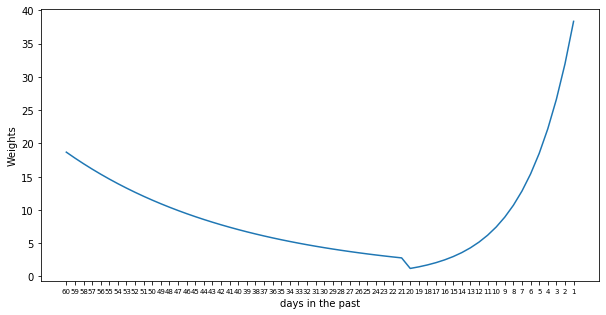

In [111]:
plt.figure(figsize=(10,5))
plt.plot(weights_final)
plt.xticks(np.arange(LONG_HISTORY), np.arange(LONG_HISTORY, 0, -1))
plt.xlabel("days in the past")
plt.ylabel("Weights")
plt.show()

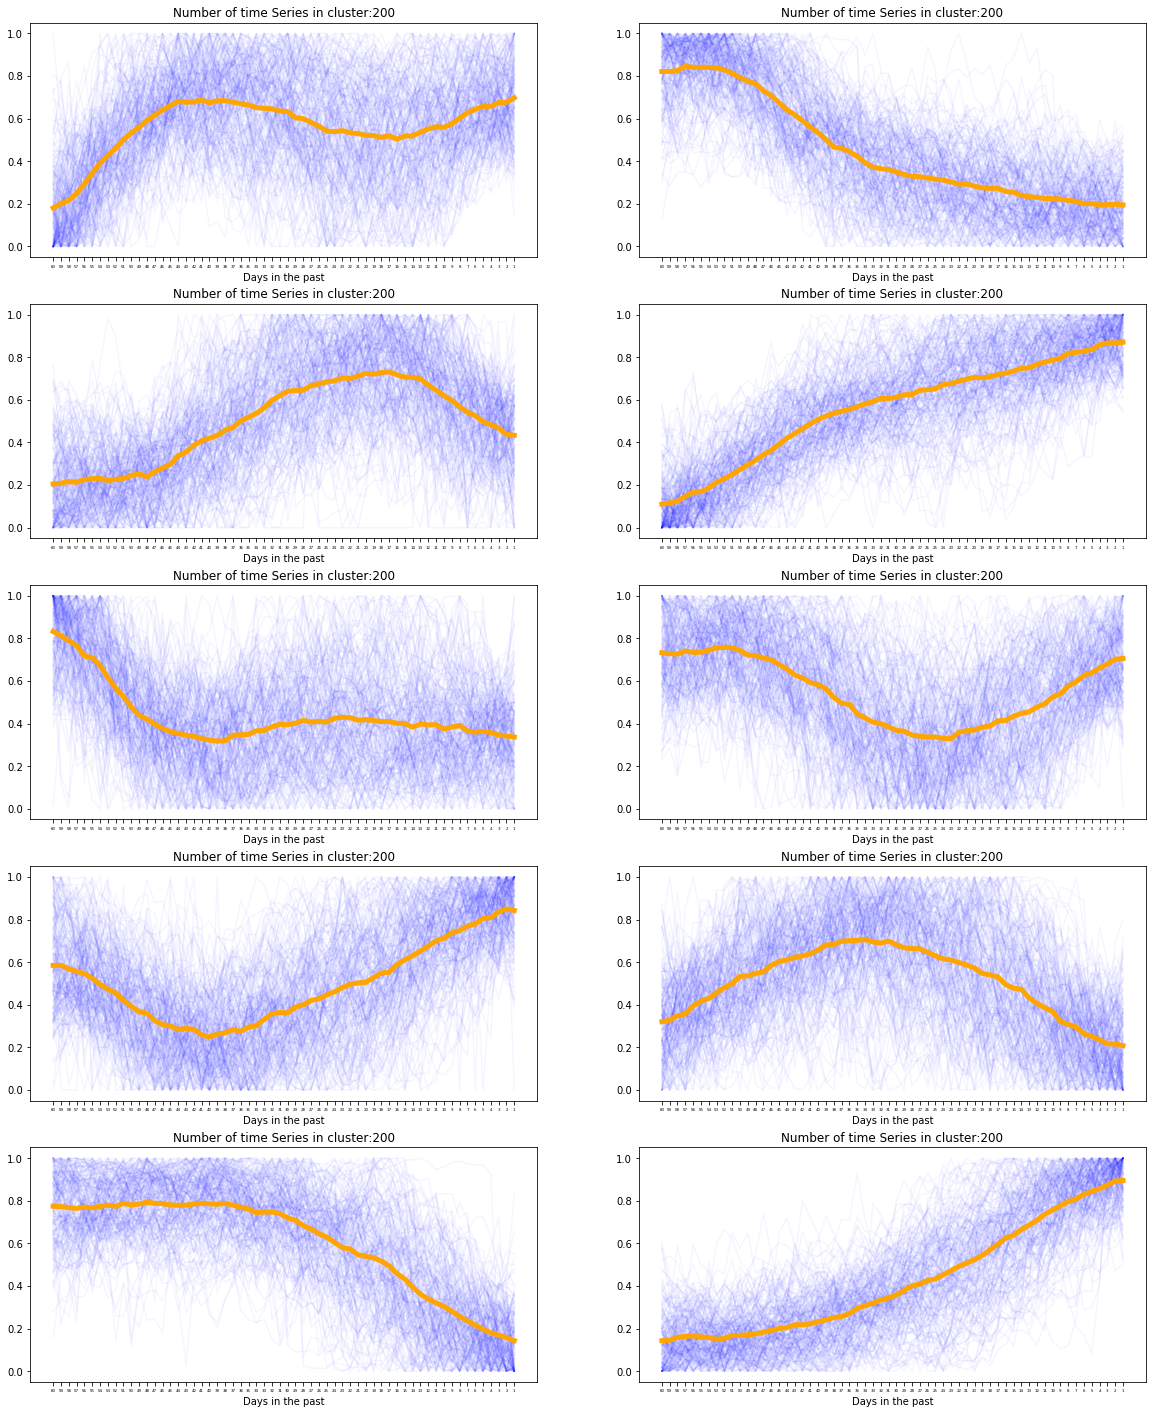

In [96]:
fig, axes = plt.subplots(n_clusters//2, 2,figsize=(20,25))
axes_list = list(axes.flatten())

for cluster_nb in range(n_clusters):
    indices = [i for i,x in enumerate(labels1) if x == cluster_nb]
    indices = np.random.choice(indices, size=200, replace=False)
    cluster_center = X[indices].mean(0)
    ax = axes_list[cluster_nb]
    ax.title.set_text('Number of time Series in cluster:' + str(len(indices)))
    for i in range(len(indices)):
        ax.plot(X[indices[i]], alpha=0.04, color='b')
        ax.set_xticks(np.arange(LONG_HISTORY))
        ax.set_xticklabels(np.arange(LONG_HISTORY, 0, -1))
        ax.set_xlabel("Days in the past")
    ax.plot(cluster_center,color='orange',linewidth=5,alpha=1,label="center"+str(cluster_nb))
plt.savefig(''.join([str(LONG_HISTORY), '_days_alpha_1_04.png']), dpi=300)

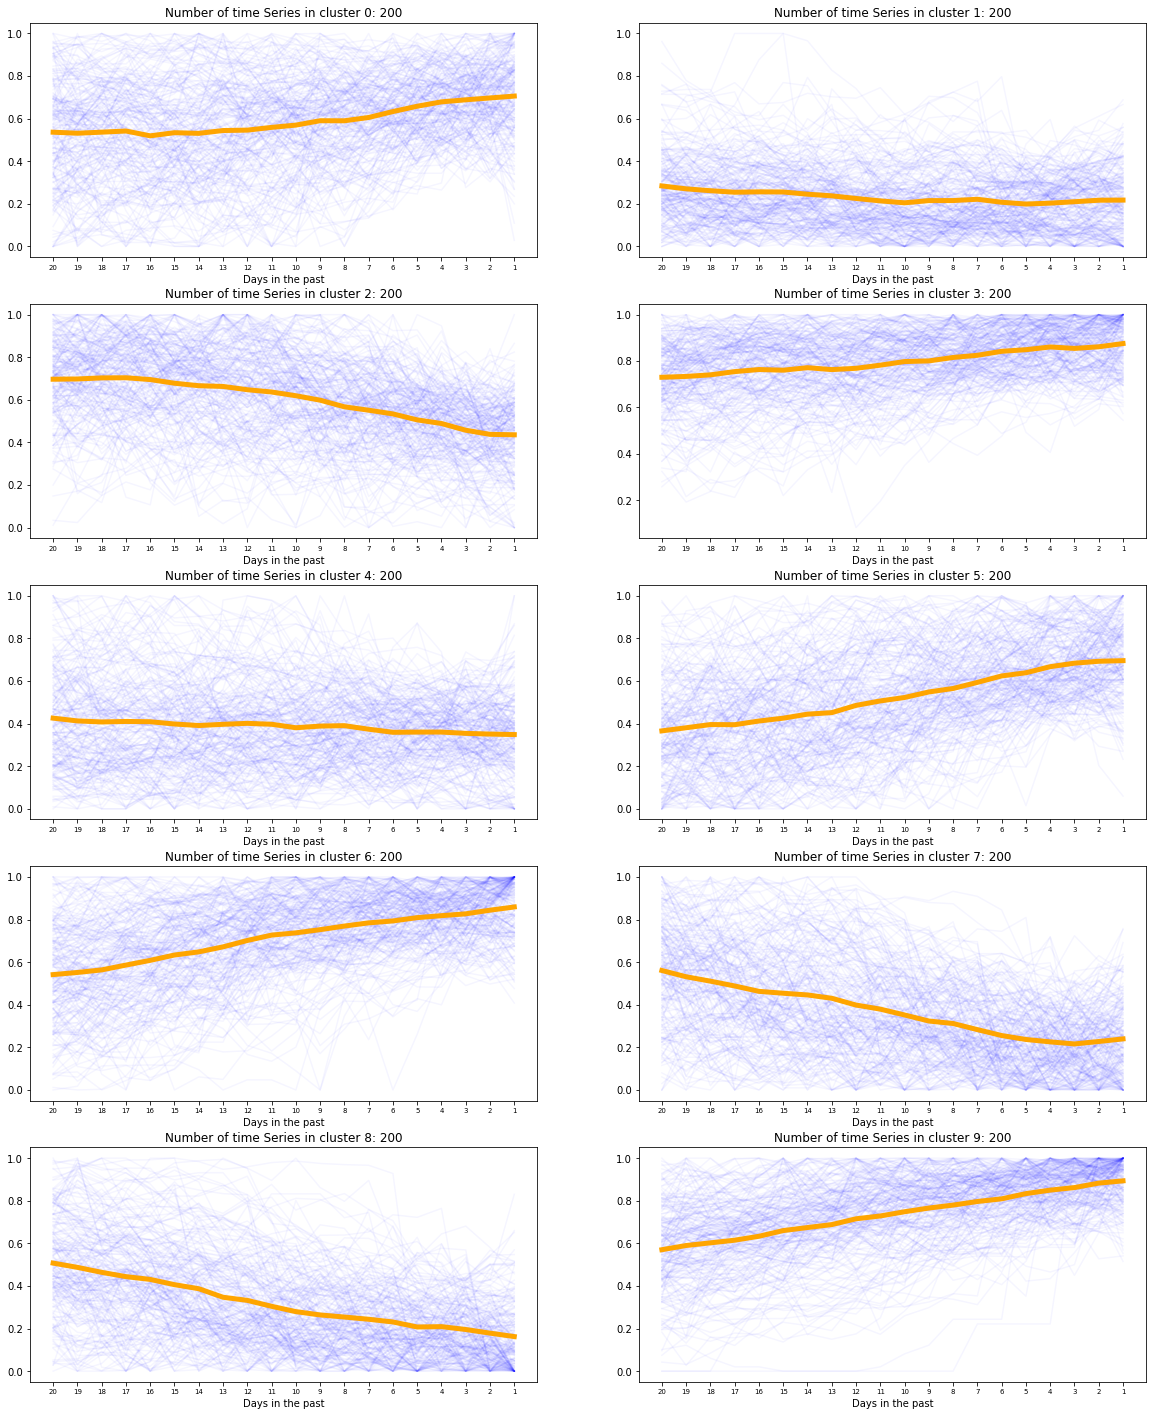

In [115]:
fig, axes = plt.subplots(n_clusters//2, 2,figsize=(20,25))
axes_list = list(axes.flatten())

for cluster_nb in range(n_clusters):
    indices = [i for i,x in enumerate(labels1) if x == cluster_nb]
    indices = np.random.choice(indices, size=200, replace=False)
    cluster_center = X[indices, (LONG_HISTORY-SHORT_HISTORY):].mean(0)
    ax = axes_list[cluster_nb]
    ax.title.set_text('Number of time Series in cluster ' + str(cluster_nb) + ': ' + str(len(indices)))
    for i in range(len(indices)):
        ax.plot(X[indices[i]][(LONG_HISTORY-SHORT_HISTORY):], alpha=0.04, color='b')
        ax.set_xticks(np.arange(SHORT_HISTORY))
        ax.set_xticklabels(np.arange(SHORT_HISTORY, 0, -1))
        ax.set_xlabel("Days in the past")
    ax.plot(cluster_center,color='orange',linewidth=5,alpha=1,label="center"+str(cluster_nb))
plt.savefig(''.join([str(SHORT_HISTORY), '_days_alpha_1_04.png']), dpi=300)

In [116]:
dir(clu)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_transform',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_iter_',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']